# Build RCNN and CNN with synthetic data

In [74]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers

import box_gen

In [21]:
# import data
data = joblib.load('sythetic_data.pkl')
X = np.asarray(data['X'])
y = np.asarray(data['y'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

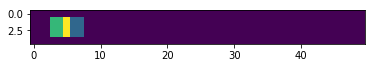

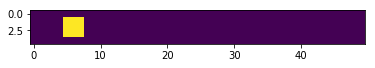

--


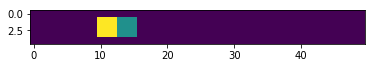

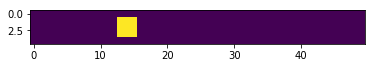

--


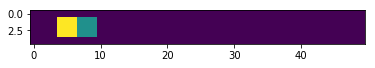

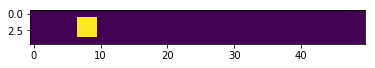

--


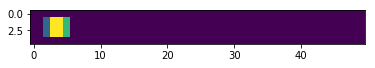

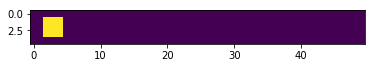

--


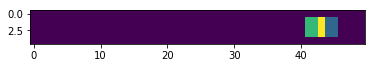

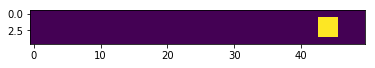

--


In [34]:
for frame, next_pos in zip(x_train[:5], y_train[:5]):
    plt.imshow(frame*2 + box_gen.get_array_with_box_at_pos(next_pos))
    plt.show()
    plt.imshow(box_gen.get_array_with_box_at_pos(next_pos))
    plt.show()
    print('--')

In [42]:
model = Sequential()

model.add(Conv2D(2, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(5, 50, 1), name='input'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, name='output'))

In [43]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [44]:
def add_1(arr):
    return arr.reshape([*arr.shape,1])

In [47]:
model.fit(add_1(x_train), add_1(y_train),
          batch_size=10,
          epochs=30,
          verbose=1,
          validation_data=(add_1(x_test), add_1(y_test)))

Train on 69 samples, validate on 30 samples
Epoch 1/30
69/69 [==============================] - 0s 260us/step - loss: 126.8188 - val_loss: 114.6788
Epoch 2/30
69/69 [==============================] - 0s 232us/step - loss: 120.4748 - val_loss: 107.5585
Epoch 3/30
69/69 [==============================] - 0s 220us/step - loss: 114.3036 - val_loss: 101.3675
Epoch 4/30
69/69 [==============================] - 0s 254us/step - loss: 108.1405 - val_loss: 96.3076
Epoch 5/30
69/69 [==============================] - 0s 225us/step - loss: 101.1753 - val_loss: 90.1265
Epoch 6/30
69/69 [==============================] - 0s 215us/step - loss: 94.4927 - val_loss: 83.9247
Epoch 7/30
69/69 [==============================] - 0s 217us/step - loss: 87.6904 - val_loss: 77.5989
Epoch 8/30
69/69 [==============================] - 0s 217us/step - loss: 80.7285 - val_loss: 71.5188
Epoch 9/30
69/69 [==============================] - 0s 200us/step - loss: 74.3735 - val_loss: 64.6146
Epoch 10/30
69/69 [===========

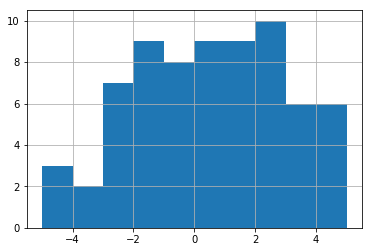

In [96]:
residual = model.predict(add_1(x_train)) - add_1(y_train)
residuals = residual.astype(int).reshape([69])
pd.Series(residuals).hist()
plt.show()

The plot above show how there are errors happening on both sides (predincting left when it should be right and vis-versa).

input


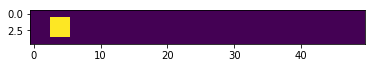

predict next frame


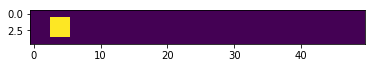

real next frame


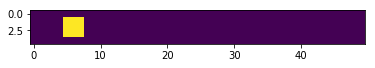

3.07006 --------

input


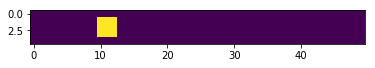

predict next frame


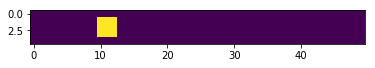

real next frame


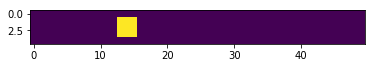

10.2078 --------

input


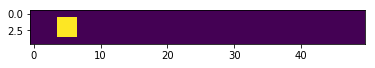

predict next frame


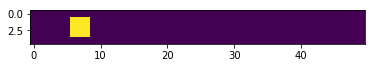

real next frame


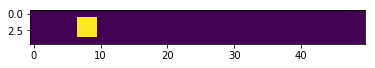

6.36793 --------

input


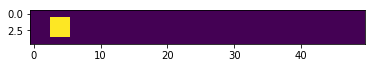

predict next frame


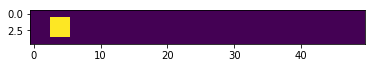

real next frame


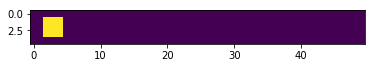

3.07006 --------

input


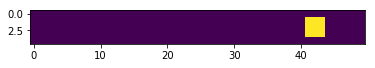

predict next frame


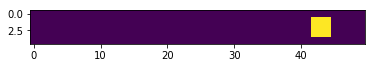

real next frame


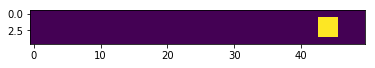

42.098 --------



In [67]:
for frame, output in zip(x_train[:5], y_train[:5]):
    single_frame = add_1(frame.reshape([1,*frame.shape]))
    pred = model.predict(single_frame)[0][0]
    
    print('input')
    plt.imshow(frame)
    plt.show()
    
    print('predict next frame')
    plt.imshow(box_gen.get_array_with_box_at_pos(pred))
    plt.show()
    
    print('real next frame')
    plt.imshow(box_gen.get_array_with_box_at_pos(output))
    plt.show()
    print(pred, '--------\n')